In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [3]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0,0)]
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth+1))
        stack.append((children_right[node_id], depth+1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
        "the following tree structure:"
        % n_nodes)

for i in range(n_nodes):
    if is_leaves[i]:
     print("{space}node={node} is a leaf node with value {value}".format(
            space=node_depth[i] * "\t", node=i, value=values[i]))
    else:
        print("{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i]))

The binary tree structure has 5 nodes and has the following tree structure:
node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value [[1. 0. 0.]]
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value [[0.         0.91666667 0.08333333]]
		node=4 is a leaf node with value [[0.         0.02564103 0.97435897]]


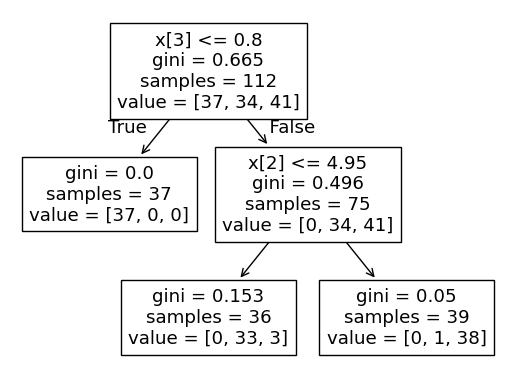

In [4]:
tree.plot_tree(clf)
plt.show()

In [5]:
node_indicator = clf.decision_path(X_test)
leave_id = clf.apply(X_test)

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
            % (node_id,
                sample_id,
                feature[node_id],
                X_test[sample_id, feature[node_id]],
                threshold_sign,
                threshold[node_id]))

Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.950000047683716)


In [6]:
sample_ids = [0, 1]

#boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) ==len(sample_ids)

#obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print ("\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(samples=sample_ids, nodes=common_node_id))

print("This is {prop}% of all nodes.".format(prop=100*len(common_node_id)/n_nodes))


The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.
